# [Part.1] Employee Churn Prediction

## ## Settings

In [203]:
# (way.1)
import sys; 
sys.path.append('../'); 
from kdh import *   

import warnings
warnings.filterwarnings('ignore')

# # (way.2)
# from importlib.machinery import SourceFileLoader        
# kdh = SourceFileLoader("kdh","../kdh.py").load_module()   

## ## Data Overview

In [204]:
d_orig = pd.read_csv('./data/employee_attrition_ibm_data.csv')
d = d_orig.copy()
dov(d)

(1470, 35)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [205]:
# d.head(5).T

#### null check

In [206]:
# null_check_msno_bar(d)

In [207]:
# null_check_for_loop(d)

In [208]:
null_check_missing_values_table(d)

[**NOTE**] There is no missing value in this dataframe.


#### peek

In [209]:
# d.info()

In [210]:
d.describe(include='all')   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### target variable

In [211]:
d.Attrition.value_counts()

No     1233
Yes    237 
Name: Attrition, dtype: int64

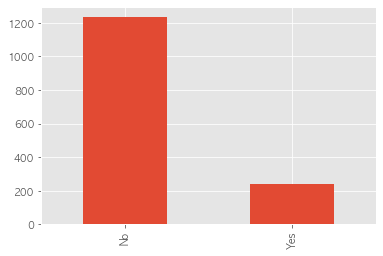

In [212]:
d.Attrition.value_counts().plot(kind='bar')

# ## Basic Common Processing

In [213]:
# Reassign target
d.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
d.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [214]:
# find useless features
li_useless_feat = []
for col in list(d.columns):
    if d[col].nunique() == 1:
        li_useless_feat.append(col)
        print(col, end=' / ')


# delete useless features
d.drop(columns=li_useless_feat, inplace=True)
d.head(2)

EmployeeCount / Over18 / StandardHours / 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [215]:
# d.corr().style.background_gradient(cmap='coolwarm')

In [216]:
d.corr().Attrition.sort_values().head(10)

TotalWorkingYears      -0.171063
JobLevel               -0.169105
YearsInCurrentRole     -0.160545
MonthlyIncome          -0.159840
Age                    -0.159205
YearsWithCurrManager   -0.156199
StockOptionLevel       -0.137145
YearsAtCompany         -0.134392
JobInvolvement         -0.130016
JobSatisfaction        -0.103481
Name: Attrition, dtype: float64

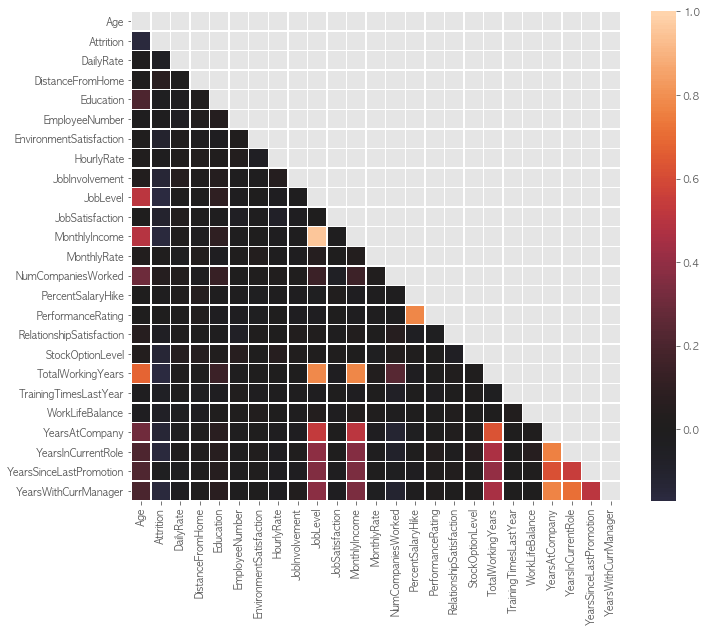

In [217]:
# Subset the dataset into all the numerical values
numeric_hr = d.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_hr._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, center=0.0,   # cmap=cmap, 
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.show()

# ## Prediction / Modeling

# anyone can change the modeling part

#### Label Encoding

In [218]:
# d.select_dtypes(include='object')

In [219]:
# Encode the categorical variables so that scikit-learn can read them
col_categorical = list(d.select_dtypes(include='object').columns)
feature_map = gen_features(columns= col_categorical, classes=[LabelEncoder])
mapping = DataFrameMapper(feature_map)
d[col_categorical] = mapping.fit_transform(d)
d.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


#### Randomforest Classification

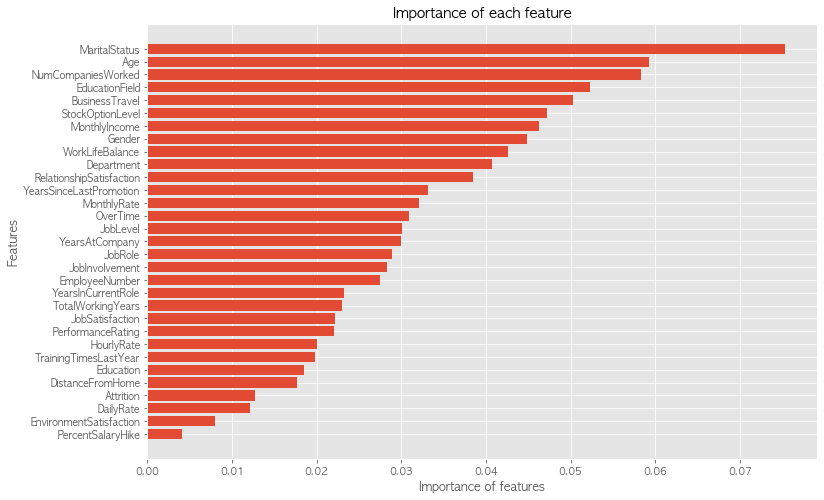

In [220]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 
rf.fit(d.drop(['Attrition'],axis=1), d.Attrition)
importances = rf.feature_importances_
names = d.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

#### Prediction / k-fold-CV (k=10)

In [221]:
# Make predictions using 10-K-Fold-CV

# Baseline:
print((d.Attrition.value_counts()/(d.shape[0]))*100)

# Accuracy
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ROC
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0    83.877551
1    16.122449
Name: Attrition, dtype: float64
[0.85034014 0.83673469 0.84353741 0.85034014 0.8707483  0.86394558
 0.83673469 0.87755102 0.85034014 0.85714286]
Accuracy: 0.85 (+/- 0.03)
[0.82740515 0.82876016 0.850271   0.72848916 0.86178862 0.7725271
 0.77557588 0.74088359 0.84870266 0.78313464]
ROC_AUC: 0.80 (+/- 0.09)


#### ----------------------------------------------------------------------

# # [Part.2] Demographic Aspect

## ## Processing / Demographic aspect

In [222]:
d.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [223]:
d.Age.min(), d.Age.max()

(18, 60)

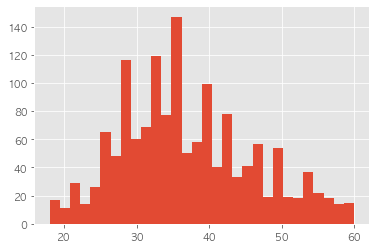

In [224]:
d.Age.hist(bins=30)

In [225]:
def age_to_born_yyyy(x):
    return 2015 - x


def cat_generation(x):
    if (x>=1940) & (x<=1959):
        return 'gen_baby_boomer'
    elif (x>=1960) & (x<=1979):
        return 'gen_x'
    elif (x>=1980) & (x<=1994):
        return 'gen_y'
    elif (x>=1995) & (x<=2010):
        return 'gen_z'
    else:
        return 'gen_alpha'        

In [226]:
d['born_yyyy'] = d.Age.apply(age_to_born_yyyy)
d['generation'] = d.born_yyyy.apply(cat_generation)
d.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x


In [227]:
d.generation.value_counts()/len(d)*100

gen_y              47.687075
gen_x              47.210884
gen_baby_boomer    3.197279 
gen_z              1.904762 
Name: generation, dtype: float64

In [228]:
d.generation.value_counts()

gen_y              701
gen_x              694
gen_baby_boomer    47 
gen_z              28 
Name: generation, dtype: int64

#### Data Separation

In [229]:
d_x = d[d.generation=='gen_x'].reset_index(drop=True)
d_y = d[d.generation=='gen_y'].reset_index(drop=True)
d_z = d[d.generation=='gen_z'].reset_index(drop=True)

In [230]:
dov(d_x)

(694, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x


In [231]:
dov(d_y)

(701, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1982,gen_y
1,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1988,gen_y


In [232]:
dov(d_z)

(28, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,20,1,1,871,1,6,3,1,137,4,0,66,2,1,2,4,2,2926,19783,1,1,18,3,2,0,1,5,3,1,0,1,0,1995,gen_z
1,19,1,2,528,2,22,1,2,167,4,1,50,3,1,8,3,2,1675,26820,1,1,19,3,4,0,0,2,2,0,0,0,0,1996,gen_z


In [233]:
d_x.Attrition.value_counts()/len(d_x)*100

0    90.057637
1    9.942363 
Name: Attrition, dtype: float64

In [234]:
d_y.Attrition.value_counts()/len(d_y)*100

0    79.457917
1    20.542083
Name: Attrition, dtype: float64

In [235]:
d_z.Attrition.value_counts()/len(d_z)*100

1    57.142857
0    42.857143
Name: Attrition, dtype: float64

## ## AB Testing

In [236]:
import random
import numpy as np 
import pandas as pd
import scipy.stats as stats

In [237]:
# sample codes (not our project)
sample = [i for i in range(1,61)]
attr_rate = [random.random() for i in range(1,31)] + [random.random()*0.2 + 0.1 for i in range(1,31)]
ab = [0 if i<31 else 1 for i in range(1,61)]   # [0]*30 + [1]*30
df = pd.DataFrame({'sample':sample, 'ab':ab, 'attr_rate':attr_rate})
display(df.head(), df.tail())

,sample,ab,attr_rate
0,1,0,0.571403
1,2,0,0.428889
2,3,0,0.578091
3,4,0,0.206098
4,5,0,0.813321


,sample,ab,attr_rate
55,56,1,0.119321
56,57,1,0.133273
57,58,1,0.261490
58,59,1,0.289539
59,60,1,0.186646


In [238]:
# set confidence interval
alpha = 0.05

In [239]:
def ab_test(ctrl, test, alpha):
    if stats.levene(ctrl, test).pvalue > alpha:
        p_value = stats.ttest_ind(ctrl, test).pvalue
    else:
        p_value = stats.ttest_ind(ctrl, test, equal_var=False).pvalue
    return 'p_value: {}'.format(p_value)    

In [240]:
index_ab = df.columns.tolist().index('ab')   # 1
for i in range(index_ab+1, len(df.columns)):
    c = df[df['ab']==0][df.columns[i]].tolist()
    t = df[df['ab']==1][df.columns[i]].tolist()
    print('{0:<12}'.format(df.columns[i]), ab_test(c, t, alpha))

attr_rate    p_value: 3.304795913746629e-06


In [241]:
display(d_x.shape, d_x.head(3))

(694, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1978,gen_x


In [242]:
display(d_y.shape, d_y.head(3))

(701, 34)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1982,gen_y
1,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1988,gen_y
2,32,0,1,1005,1,2,2,1,8,4,1,79,3,1,2,4,2,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,1983,gen_y


#### grouping samples

In [336]:
d_x, d_y

(701, 34)

d_x
 - sample.1 >> 23 rows
 - s.2      >> 23 rows
 ...
 - s.30
 
d_y
 - s.1
 - s.2
 ...
 - s.30
 
 
d_x
 - s.1 >> 30 rows
 - s.2 >> 30 rows
 ...
 - s.23
 

#### # x

In [340]:
x_s1 = d_x.sample(n=30)
rest = d_x.drop(x_s1.index)

li_x_s = ['x_s1']
li_samples_x = ['index_0_no_sample_df', x_s1]
for i in range(2, 99):   # 30: arbitrary
    if len(rest) < 30:
        break;
    var = 'x_s'+str(i)
    li_x_s.append(var)
    var = rest.sample(n=30)
    li_samples_x.append(var)
    rest = rest.drop(var.index)
    # print('sample_{}: {},{}'.format(i, var.shape, rest.shape))

In [341]:
li_churn_rates_x = []
for i in range(1,24):
    cr = li_samples[i].Attrition.sum() / len(li_samples[i])
    li_churn_rates_x.append(cr)

li_churn_rates_x

[0.06666666666666667,
 0.03333333333333333,
 0.03333333333333333,
 0.1,
 0.16666666666666666,
 0.1,
 0.2,
 0.23333333333333334,
 0.1,
 0.13333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.0,
 0.1,
 0.1,
 0.13333333333333333,
 0.1,
 0.13333333333333333,
 0.06666666666666667,
 0.1,
 0.06666666666666667,
 0.13333333333333333]

#### # y

In [343]:
y_s1 = d_y.sample(n=30)
rest = d_y.drop(y_s1.index)

li_y_s = ['y_s1']
li_samples_y = ['index_0_no_sample_df', y_s1]
for i in range(2, 99):   # 100: arbitrary
    if len(rest) < 30:
        break;
    var = 'y_s'+str(i)
    li_y_s.append(var)
    var = rest.sample(n=30)
    li_samples_y.append(var)
    rest = rest.drop(var.index)
    # print('sample_{}: {},{}'.format(i, var.shape, rest.shape))

In [344]:
li_churn_rates_y = []
for i in range(1,24):
    cr = li_samples_y[i].Attrition.sum() / len(li_samples_y[i])
    li_churn_rates_y.append(cr)

li_churn_rates_y[0:5]

[0.16666666666666666, 0.23333333333333334, 0.2, 0.3333333333333333, 0.2]

In [ ]:
li_x_s, li_y_s, li_churn_rates_x, li_churn_rates_y

In [326]:
li_x_s[-5:], li_y_s[:5]

(['x_s19', 'x_s20', 'x_s21', 'x_s22', 'x_s23'],
 ['y_s1', 'y_s2', 'y_s3', 'y_s4', 'y_s5'])

In [345]:
sample = li_x_s + li_y_s
ab = ['0']*len(li_x_s) + ['1']*len(li_y_s)
churn_rate = li_churn_rates_x + li_churn_rates_y
df = pd.DataFrame({'sample':sample, 'ab':ab, 'churn_rate':churn_rate})
display(df.head(3), df.tail(3))

,sample,ab,churn_rate
0,x_s1,0,0.066667
1,x_s2,0,0.033333
2,x_s3,0,0.033333


,sample,ab,churn_rate
43,y_s21,1,0.2
44,y_s22,1,0.2
45,y_s23,1,0.2


#### H0 : There is no difference in attrition rate between gen-x group and gen-y group
#### H1 : There is a difference in attrition rate between gen-x group and gen-y group

In [346]:
index_ab = df.columns.tolist().index('ab')   # 1
for i in range(index_ab+1, len(df.columns)):
    c = df[df['ab']=='0'][df.columns[i]].tolist()
    t = df[df['ab']=='1'][df.columns[i]].tolist()
    print('{0:<12}'.format(df.columns[i]), ab_test(c, t, alpha))

churn_rate   p_value: 4.3808946480548586e-07


#### Bcz p-val < 0.05, we can reject H0
 - ~ (There is no difference in attrition rate between gen-x group and gen-y group)
 - There is a difference in attrition rate between gen-x group and gen-y group

#### next testings

 - H0 : There is no diff. in 'var() or comb(vars)' between x-group and y-group.
 - H1 : There is a diff. in 'var() or comb(vars)' between x-group and y-group.

#### age...

modeling code location?  
meaningful variable?  

 - randomly sampling d_y : 30 samples & about 23 person per 1 sample >> totally, 30 sample means
 - randomly sampling d_x : 30 samples & about 23 person per 1 sample >> totally, 30 sample means 
 - t-testing using those 30 samples >> get p-value for significance about 'attrition rate'

#### H0 : There is no difference in attrition rate between gen-x group and gen-y group
#### H1 : There is a difference in attrition rate between gen-x group and gen-y group

In [41]:
d_attrition_x
d_attrition_y

NameError: name 'd_attrition_x' is not defined

# # GC...

In [ ]:
li = []
for i in range(1,61):
    if i<31:
        li.append(0)
    else:
        li.append(1)

In [ ]:
li[0:5], li[-5:]

In [ ]:
li = []
for i in range(1,61):
    if i<31:
        li.append(0)
    else:
        li.append(1)

In [ ]:
[i for i in range(1,10)]

# # Eplore / ...

In [ ]:
display(d_orig.DistanceFromHome.value_counts()[0:5], d_orig.DistanceFromHome.min(), d_orig.DistanceFromHome.max())

In [ ]:
d_orig.DistanceFromHome.hist(bins=30)

In [ ]:
# #practice
# s = d_orig.DistanceFromHome.value_counts()
# df = pd.DataFrame(s)
# df.reset_index(inplace = True)
# df.plot(kind='bar', x='index', y='DistanceFromHome')

In [ ]:
d_orig.MaritalStatus.value_counts()

In [ ]:
d_orig.Age.hist(bins=30)

In [ ]:
d_orig.Age.min(), d_orig.Age.max()

In [ ]:
d_orig.Gender.value_counts()

# gc

In [ ]:
# import math
# import time
# import datetime
# import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt
# import seaborn as sns

# import warnings
# from pandasql import sqldf

# from scipy import stats
# import statsmodels.formula.api as smf
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC 

# plt.rcParams['font.family'] = 'AppleGothic'
# plt.style.use('ggplot')   # fivethirtyeight
# psd = lambda q: sqldf(q, gloabls())
# warnings.filterwarnings('ignore')

In [ ]:
# x = np.arange(-2.1,2.1,0.1)
# y = np.power(np.arange(-2.1,2.1,0.1),4) - 16
# plt.figure(figsize=(12,6))
# plt.plot(x,y)